# Лабораторная работа: Аппроксимация и линеаризация функций


## Вспомогательные функции:
Реализовать функцию, вычисляющую среднеквадратичное отклонение (СКО) набора числовых данных

In [1]:
import numpy as np

def calculate_rmse(y_true, y_pred):
    """
    Вычисляет среднеквадратичное отклонение (RMSE).
    
    Параметры:
    y_true -- массив реальных значений
    y_pred -- массив предсказанных (расчетных) значений
    """
    return np.sqrt(np.mean((y_true - y_pred)**2))

def calculate_r_squared(y_true, y_pred):
    """
    Вычисляет коэффициент детерминации R^2.
    """
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)


# 1: Линейная аппроксимация (МНК)

## Описание
Изучается процесс нагрева воды в электрическом чайнике. Измеряется температура воды 
T в градусах Цельсия в зависимости от времени нагрева 
t в минутах. Из-за постоянного поступления тепла температура воды растёт почти линейно на начальном этапе.

### Задача
Найти линейную зависимость температуры воды от времени нагрева в виде уравнения:
\[
T = a t + b,
\]
### Требуется
- Определить коэффициенты \(a\) и \(b\),
- Построить график зависимости температуры от времени, отображая экспериментальные точки и линию аппроксимации,
- Рассчитать среднеквадратичное отклонение (СКО) между экспериментальными и расчетными значениями температуры, чтобы проверить точность модели.


## Исходные данные

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Данные: время нагрева (мин) и температура (°C)
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
T = np.array([20.0, 22.3, 24.7, 27.2, 29.6, 32.1, 34.5, 37.0, 39.3, 41.9, 44.2])

Уравнение зависимости: T = 2.4336 * t + 19.9045
Среднеквадратичное отклонение (RMSE): 0.0583 °C


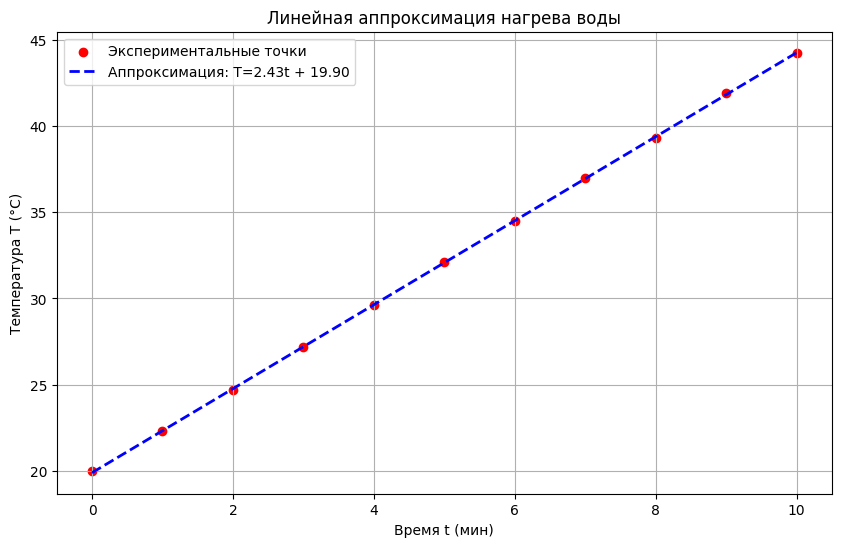

In [3]:
coefficients = np.polyfit(t, T, 1)
a = coefficients[0]
b = coefficients[1]

print(f"Уравнение зависимости: T = {a:.4f} * t + {b:.4f}")

T_pred = a * t + b

rmse_val = calculate_rmse(T, T_pred)
print(f"Среднеквадратичное отклонение (RMSE): {rmse_val:.4f} °C")

plt.figure(figsize=(10, 6))
plt.scatter(t, T, color='red', label='Экспериментальные точки')
plt.plot(t, T_pred, color='blue', linestyle='--', linewidth=2, label=f'Аппроксимация: T={a:.2f}t + {b:.2f}')

plt.title('Линейная аппроксимация нагрева воды')
plt.xlabel('Время t (мин)')
plt.ylabel('Температура T (°C)')
plt.legend()
plt.grid(True)
plt.show()


# 2: Линеаризация экспоненциальной функции

## Описание
Изучается процесс разрядки аккумулятора мобильного устройства. Известно, что напряжение аккумулятора \( V(t) \) со временем уменьшается по экспоненциальному закону:
$V(t) = a \cdot e^{bt}$

Требуется:
- Линеаризовать экспоненциальную функцию,
- Найти параметры \( a \) и \( b \),
- Построить график зависимости напряжения от времени (экспериментальные данные и аппроксимация),
- Спрогнозировать дальнейшее падение напряжения,
- Рассчитать среднеквадратичное отклонение (СКО).

## Исходные данные

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Данные разрядки аккумулятора
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
voltage = np.array([4.15, 4.09, 4.02, 3.96, 3.89, 3.83, 3.76, 3.70, 3.64, 3.58, 3.52, 3.47, 3.43, 3.40, 3.38, 3.37])

## Процесс линеаризации

**Шаг 1:** Исходная функция: $T(t) = a \cdot e^{bt}$

**Шаг 2:** Логарифмируем обе части:
$\ln(T) = \ln(a) + bt$

**Шаг 3:** Делаем замены: $g = \ln(T)$, $t = t$, $c = \ln(a)$, $d = b$

**Шаг 4:** Получаем линейную функцию: $g = c + d \cdot t$

Найденные параметры: a = 4.1883, b = -0.0149
Формула: V(t) = 4.1883 * e^(-0.0149 * t)
Среднеквадратичное отклонение (RMSE): 0.0274 В
Прогноз напряжения на 20-й час: 3.1099 В


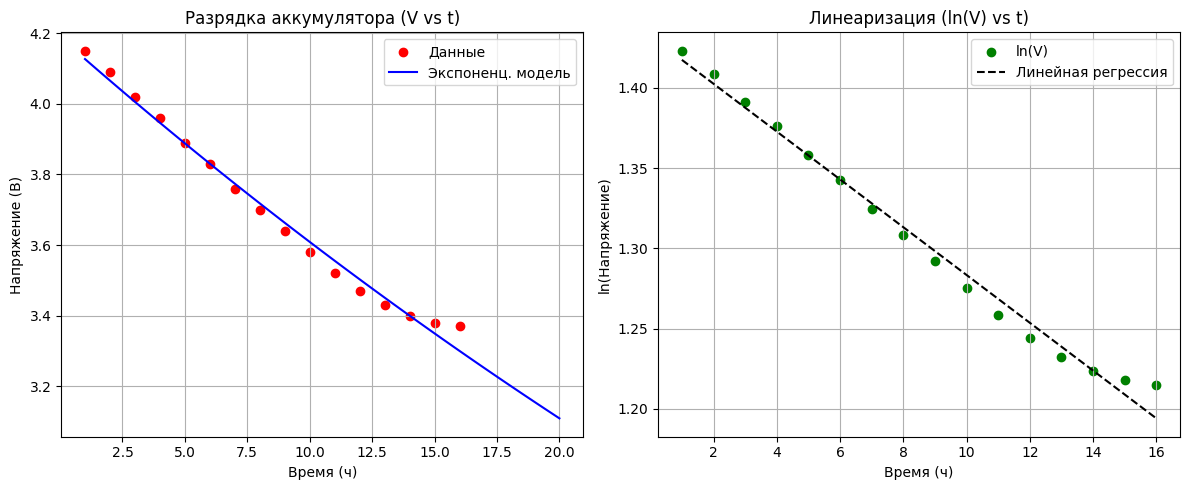

In [5]:
log_voltage = np.log(voltage)

coeffs_exp = np.polyfit(hours, log_voltage, 1)
b_param = coeffs_exp[0]
ln_a = coeffs_exp[1]

a_param = np.exp(ln_a)

print(f"Найденные параметры: a = {a_param:.4f}, b = {b_param:.4f}")
print(f"Формула: V(t) = {a_param:.4f} * e^({b_param:.4f} * t)")

hours_extended = np.linspace(1, 20, 100) 
voltage_pred_smooth = a_param * np.exp(b_param * hours_extended)

voltage_pred_points = a_param * np.exp(b_param * hours)

rmse_exp = calculate_rmse(voltage, voltage_pred_points)
print(f"Среднеквадратичное отклонение (RMSE): {rmse_exp:.4f} В")

v_20 = a_param * np.exp(b_param * 20)
print(f"Прогноз напряжения на 20-й час: {v_20:.4f} В")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(hours, voltage, color='red', label='Данные')
plt.plot(hours_extended, voltage_pred_smooth, color='blue', label='Экспоненц. модель')
plt.title('Разрядка аккумулятора (V vs t)')
plt.xlabel('Время (ч)')
plt.ylabel('Напряжение (В)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(hours, log_voltage, color='green', label='ln(V)')
plt.plot(hours, ln_a + b_param * hours, color='black', linestyle='--', label='Линейная регрессия')
plt.title('Линеаризация (ln(V) vs t)')
plt.xlabel('Время (ч)')
plt.ylabel('ln(Напряжение)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Вариант задание выбирается Номер в списке % 3

# Задание 3 Вариант 2

## Описание задачи
При исследовании освещённости поверхности в зависимости от расстояния до точечного источника света проведены измерения интенсивности света. Теоретически свет распространяется по закону обратных квадратов, но из-за рассеяния и поглощения в атмосфере показатель степени может отличаться от -2. Экспериментальные данные:

| Расстояние (м) | 0.5 | 1.0 | 1.5 | 2.0 | 2.5 | 3.0 | 4.0 | 5.0 | 6.0 | 7.0 |
|---|---|---|---|---|---|---|---|---|---|---|
| Интенсивность (люкс) | 2000 | 520 | 235 | 135 | 87 | 62 | 35 | 23 | 16 | 12 |

## Задание

1. Предположите **степенную функцию** вида $I = c \cdot r^\alpha$, где $r$ — расстояние до источника, $I$ — интенсивность света, $c$ и $\alpha$ — параметры.

2. Выполните **двойную логарифмическую линеаризацию**:
   $\ln(I) = \ln(c) + \alpha \ln(r)$

3. Постройте **линейную регрессию** для координат $(\ln r, \ln I)$:
   - Найдите коэффициенты регрессии
   - Вычислите коэффициент корреляции и $R^2$
   - Определите доверительный интервал для параметра $\alpha$

4. Восстановите параметры степенной функции $c$ и $\alpha$.

5. Выполните **анализ отклонений от теории**:
   - Сравните полученное значение $\alpha$ с теоретическим $\alpha = -2$
   - Объясните причины отклонения (рассеяние, поглощение, асферичность источника)

6. Создайте **графики**:
   - Двойной логарифмический график с линией регрессии
   - Исходные данные в линейном масштабе со степенной кривой
   - График остатков с выявлением систематических погрешностей

7. Вычислите **относительную ошибку** для каждой точки в процентах:
   $\delta_i = \frac{|I_{измеренная} - I_{предсказанная}|}{I_{измеренная}} \times 100\%$

8. Определите, в каком диапазоне расстояний модель работает наиболее точно, и объясните причины изменения точности.

9. Используя полученную модель, предскажите интенсивность света на расстояниях:
   - 0.3 м (экстраполяция в близкую область)
   - 10 м (экстраполяция в дальнюю область)
   - Оцените надежность предсказаний


--- Результаты моделирования (Вариант 2) ---
Полученная модель: I = 518.86 * r^(-1.9397)
Коэффициент детерминации R^2: 0.99999

Теоретическая степень: -2.0
Экспериментальная степень: -1.9397
Отклонение: 0.0603
Вывод: Значение близко к -2, но есть отклонения, вызванные погрешностями измерений,
рассеянием света в среде или тем, что источник не является идеально точечным.

--- Таблица ошибок ---
Расстояние (м)  Факт (люкс)     Модель (люкс)   Ошибка (%)
0.5             2000            1990.5          0.48      
1.0             520             518.9           0.22      
1.5             235             236.3           0.56      
2.0             135             135.3           0.19      
2.5             87              87.7            0.85      
3.0             62              61.6            0.64      
4.0             35              35.3            0.73      
5.0             23              22.9            0.56      
6.0             16              16.1            0.36      
7.0           

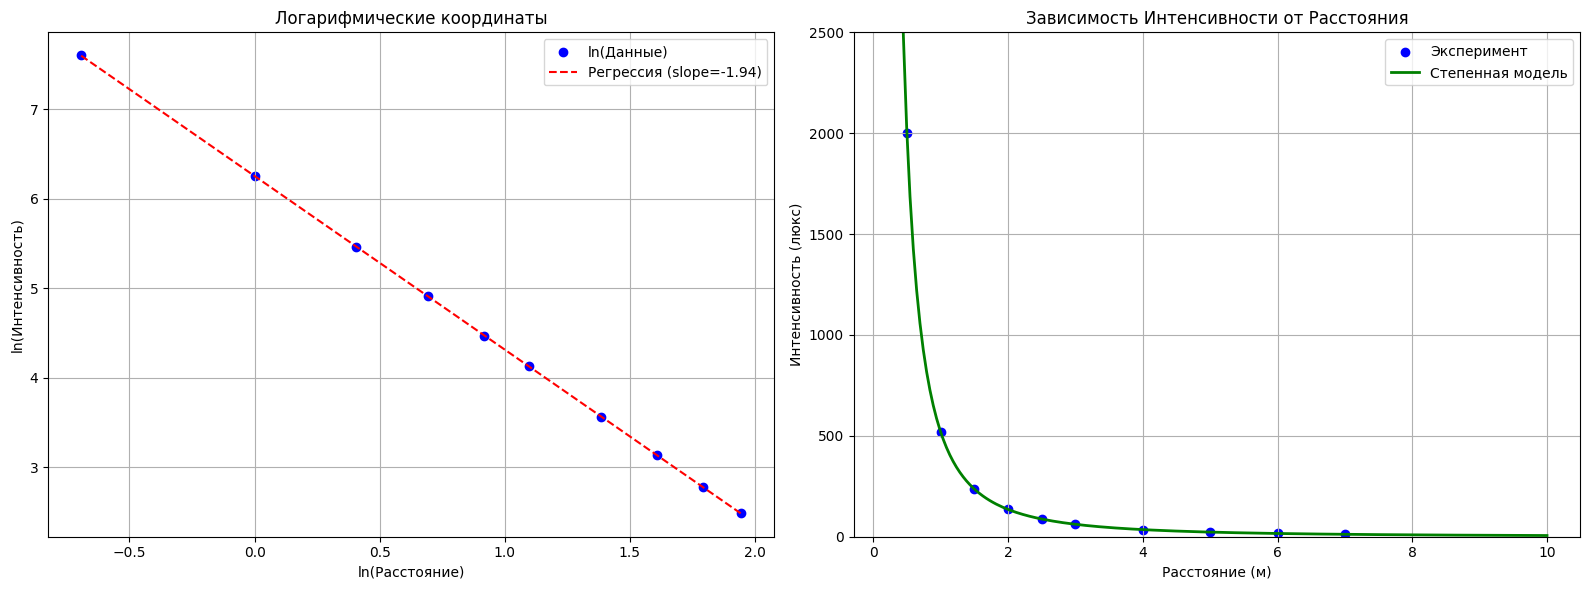

In [6]:
dist = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0])
intensity = np.array([2000, 520, 235, 135, 87, 62, 35, 23, 16, 12])

log_r = np.log(dist)
log_I = np.log(intensity)

coeffs_light = np.polyfit(log_r, log_I, 1)
alpha = coeffs_light[0]
ln_c = coeffs_light[1]
c_param = np.exp(ln_c)

log_I_pred = ln_c + alpha * log_r
r2_score = calculate_r_squared(log_I, log_I_pred)

print(f"--- Результаты моделирования (Вариант 2) ---")
print(f"Полученная модель: I = {c_param:.2f} * r^({alpha:.4f})")
print(f"Коэффициент детерминации R^2: {r2_score:.5f}")

theoretical_alpha = -2.0
print(f"\nТеоретическая степень: {theoretical_alpha}")
print(f"Экспериментальная степень: {alpha:.4f}")
print(f"Отклонение: {abs(alpha - theoretical_alpha):.4f}")
print("Вывод: Значение близко к -2, но есть отклонения, вызванные погрешностями измерений,")
print("рассеянием света в среде или тем, что источник не является идеально точечным.")

I_model = c_param * (dist ** alpha)
relative_errors = (np.abs(intensity - I_model) / intensity) * 100

print("\n--- Таблица ошибок ---")
print(f"{'Расстояние (м)':<15} {'Факт (люкс)':<15} {'Модель (люкс)':<15} {'Ошибка (%)':<10}")
for r_val, i_fact, i_mod, err in zip(dist, intensity, I_model, relative_errors):
    print(f"{r_val:<15.1f} {i_fact:<15.0f} {i_mod:<15.1f} {err:<10.2f}")

print(f"\nСредняя относительная ошибка: {np.mean(relative_errors):.2f}%")

r_near = 0.3
r_far = 10.0
pred_near = c_param * (r_near ** alpha)
pred_far = c_param * (r_far ** alpha)

print(f"\n--- Прогноз ---")
print(f"Интенсивность на 0.3 м: {pred_near:.2f} люкс")
print(f"Интенсивность на 10.0 м: {pred_far:.2f} люкс")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(log_r, log_I, color='blue', label='ln(Данные)')
axes[0].plot(log_r, log_I_pred, 'r--', label=f'Регрессия (slope={alpha:.2f})')
axes[0].set_title('Логарифмические координаты')
axes[0].set_xlabel('ln(Расстояние)')
axes[0].set_ylabel('ln(Интенсивность)')
axes[0].grid(True)
axes[0].legend()

r_smooth = np.linspace(0.2, 10, 200)
I_smooth = c_param * (r_smooth ** alpha)

axes[1].scatter(dist, intensity, color='blue', label='Эксперимент')
axes[1].plot(r_smooth, I_smooth, 'g-', linewidth=2, label='Степенная модель')
axes[1].set_title('Зависимость Интенсивности от Расстояния')
axes[1].set_xlabel('Расстояние (м)')
axes[1].set_ylabel('Интенсивность (люкс)')
axes[1].set_ylim(0, 2500)
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()